In [1]:
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from data.dataset_1 import read_data
from lib.markov_models import HMM

# Data reading

In [2]:
dataset = read_data()
random.shuffle(dataset)
print("Samples:", len(dataset))

Samples: 329


# Evaluation

## Majority classifier

In [3]:
# Perform majority classifier (always predict exon)
accuracies = []
accuracies_weighted = []
normalization_sum = 0
for _, path in dataset:
    c_pred = path.count('e')
    accuracies.append(c_pred / len(path))
    accuracies_weighted.append(c_pred)
    normalization_sum += len(path)
    
print("Unweighted accuracy:", np.mean(accuracies) * 100, '[%]')
print("Weighted accuracy:", sum(accuracies_weighted) / normalization_sum * 100, '[%]')

Unweighted accuracy: 75.3184130241 [%]
Weighted accuracy: 81.04262512788894 [%]


## Supervised learning

In [4]:
# init HMM
t, e = HMM.init_matrices_randomly('ei', 'ACTG')
hmm = HMM(t, e)

In [5]:
# Perform n-fold cross validation
# Calculate weighted and unweighted accuracy
accuracies = []
accuracies_weighted = []
normalization_sum = 0
pred_pairs = []
for  k, example in enumerate(dataset):
    hmm.supervised_learning(dataset[:k] + dataset[(k + 1):])
    acc, pred = hmm.test([example], True)
    
    pred_pairs += list(zip(pred[0][0], pred[0][1]))
    accuracies.append(acc)
    accuracies_weighted.append(acc * len(example[0]))
    normalization_sum += len(example[0])

In [6]:
print("Unweighted accuracy:", np.mean(accuracies) * 100, '[%]')
print("Weighted accuracy:", sum(accuracies_weighted) / normalization_sum * 100, '[%]')

Unweighted accuracy: 75.2620292992 [%]
Weighted accuracy: 84.86066034731586 [%]


### Plot of gene length and accuracy dependency

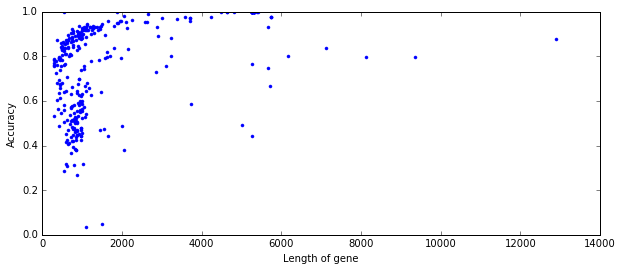

In [7]:
plt.figure(figsize=(10, 4))
plt.title('')
plt.xlabel('Length of gene')
plt.ylabel('Accuracy')
plt.plot([len(s[0]) for s in dataset], accuracies, '.');

### Confusion matrix

In [8]:
c = collections.Counter(pred_pairs)
print('\te\ti')
probs = [c[('e','e')] / (c[('e','e')] + c[('e','i')]),
         c[('e','i')] / (c[('e','e')] + c[('e','i')]),
         c[('i','e')] / (c[('i','e')] + c[('i','i')]),
         c[('i','i')] / (c[('i','e')] + c[('i','i')])]
probs = list(map(lambda x: str(round(x*100, 2)) + '%', probs))
print('e', probs[0], probs[1], sep='\t')
print('i', probs[2], probs[3], sep='\t')

	e	i
e	94.98%	5.02%
i	58.4%	41.6%


## Unsupervised learning

### Viterbi learning

In [9]:
# init HMM
t, e = HMM.init_matrices_randomly('ei', 'ACTG')
hmm = HMM(t, e)

In [10]:
print("Unweighted accuracy:", hmm.test(dataset) * 100, '[%]')
print("Weighted accuracy:", hmm.test_weighted(dataset) * 100, '[%]')
print()
print(hmm)

Unweighted accuracy: 55.17600511317394 [%]
Weighted accuracy: 56.22607375888447 [%]

-------- init state dist
e	0.5
i	0.5
-------- transmission dist
	e	i	
e	0.67	0.33	
i	0.852	0.148	
-------- emission dist
	A	C	G	T
e	0.003	0.302	0.193	0.502	
i	0.049	0.579	0.061	0.311	



In [11]:
hmm.viterbi_learning_batch(dataset, iterations=5)

In [12]:
print("Unweighted accuracy:", hmm.test(dataset) * 100, '[%]')
print("Weighted accuracy:", hmm.test_weighted(dataset) * 100, '[%]')
print()
print(hmm)

Unweighted accuracy: 59.132641678556666 [%]
Weighted accuracy: 61.08856351083075 [%]

-------- init state dist
e	0.5
i	0.5
-------- transmission dist
	e	i	
e	0.811	0.189	
i	0.789	0.211	
-------- emission dist
	A	C	G	T
e	0.0	0.261	0.245	0.494	
i	1.0	0.0	0.0	0.0	



# Knowledge mining

In [13]:
t, e = HMM.init_matrices_randomly('ei', 'ACTG')
hmm = HMM(t, e)
hmm.supervised_learning(dataset)

In [14]:
print(hmm)

-------- init state dist
e	1.0
i	0.0
-------- transmission dist
	e	i	
e	0.999	0.001	
i	0.003	0.997	
-------- emission dist
	A	C	G	T
e	0.33	0.199	0.183	0.288	
i	0.359	0.141	0.16	0.339	

